In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Load
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Conv2D, MaxPool2D, Dropout, Flatten, Dense

# Data Load

In [ ]:
width, height = 800, 400   # define the size of input image
datagen = ImageDataGenerator(rescale=1/256.0, validation_split=0.2)   # generate batches of tensor image data

In [ ]:
# Generates batches of tensor image data for training
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/Image/',
                                           target_size=(width,height),
                                           color_mode='grayscale',
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           subset='training')

Found 337 images belonging to 5 classes.


In [ ]:
# Generates batches of tensor image data for validation(test)
valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/Image/',
                                         target_size=(width,height),
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         batch_size = 16,
                                         subset='validation')

Found 81 images belonging to 5 classes.


In [ ]:
for image_batch, labels_batch in trainDatagen:
  print(image_batch.shape)   # 출력 : (batch_size, target_size, channel)
  print(labels_batch.shape)   # 출력 : shape of corresponding labels = (batch_size, # of labels)
  break

(64, 800, 400, 1)
(64, 5)


In [ ]:
print(trainDatagen.class_indices)
print(valDatagen.class_indices)

{'asc': 0, 'des': 1, 'fal': 2, 'ris': 3, 'sym': 4}
{'asc': 0, 'des': 1, 'fal': 2, 'ris': 3, 'sym': 4}


# Model

In [ ]:
'''Classificaion Model'''

num_classes = 5   # 'asc'(Ascending Triangle), 'des'(Descending Triangle), 'fal'(Falling Wedge), 'ris'(Rising Wedge), 'sym'(Symmetric Triangle)

model = Sequential()   # groups a linear stack of layers into a tensorflow.keras.Model

# Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(800, 400, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', name='target_layer'))   # the layer to be used in Grad-CAM (the last convolutional layer of Conv2D)

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Model Fitting & Training

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(trainDatagen, epochs=30, validation_data = valDatagen)

Epoch 1/30
6/6 [==============================] - 5s 819ms/step - loss: 1.6116 - accuracy: 0.3086 - val_loss: 1.5946 - val_accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 4s 653ms/step - loss: 1.5840 - accuracy: 0.3264 - val_loss: 1.6046 - val_accuracy: 0.3333
Epoch 3/30
6/6 [==============================] - 4s 700ms/step - loss: 1.5859 - accuracy: 0.2789 - val_loss: 1.5689 - val_accuracy: 0.3333
Epoch 4/30
6/6 [==============================] - 4s 701ms/step - loss: 1.5318 - accuracy: 0.3027 - val_loss: 1.4904 - val_accuracy: 0.3333
Epoch 5/30
6/6 [==============================] - 5s 708ms/step - loss: 1.4795 - accuracy: 0.3234 - val_loss: 1.3923 - val_accuracy: 0.3951
Epoch 6/30
6/6 [==============================] - 5s 709ms/step - loss: 1.3243 - accuracy: 0.4095 - val_loss: 1.2990 - val_accuracy: 0.4198
Epoch 7/30
6/6 [==============================] - 5s 719ms/step - loss: 1.2446 - accuracy: 0.3887 - val_loss: 1.2612 - val_accuracy: 0.3951
Epoch 8/30
6/6 [====

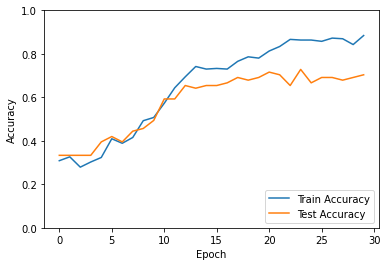

In [ ]:
# Accuracy Visualization

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
# Report Test Accuracy

test_loss, test_acc = model.evaluate(valDatagen)
print(f'Test Accuracy : {round(100*test_acc, 4)}%')

6/6 [==============================] - 1s 83ms/step - loss: 2.5675 - accuracy: 0.7037
Test Accuracy : 70.3704%
